In [358]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Training data
app_train = pd.read_csv(r'c:\users\hudson\Brenda\house-prices\train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

# Testing data features
final_app_test = pd.read_csv(r'c:\users\hudson\Brenda\house-prices\test.csv')
print('Testing data shape: ', final_app_test.shape)
final_app_test.head()

Training data shape:  (1460, 81)
Testing data shape:  (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


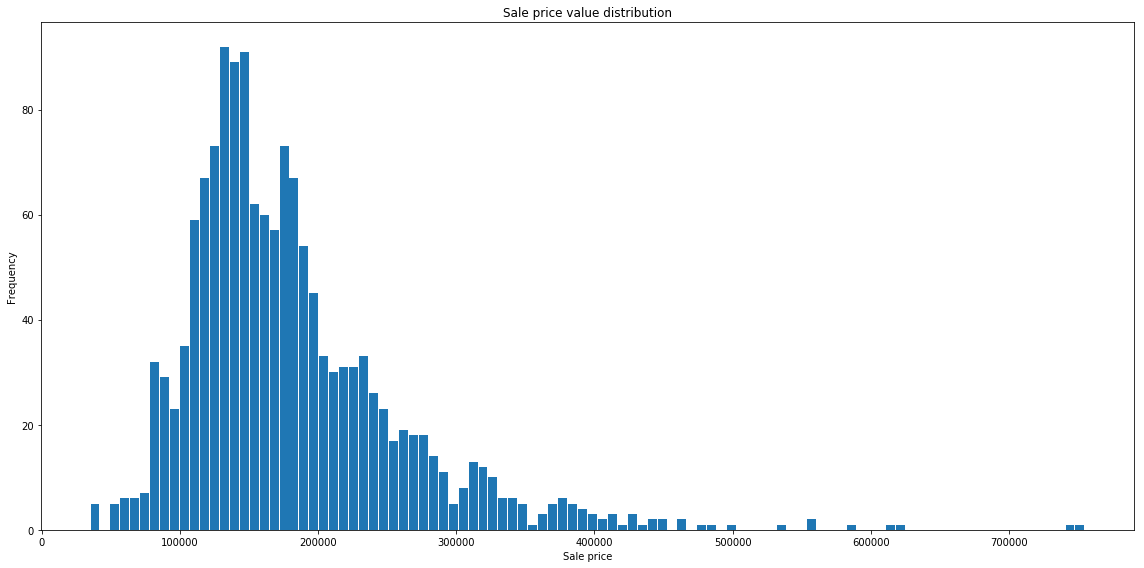

In [359]:
#check target variable distribution by histogram
plt.figure(figsize=(16,8)) 
app_train.SalePrice.plot(kind='hist', bins=100, rwidth=0.9) 
plt.title('Sale price value distribution')
plt.xlabel('Sale price')
plt.tight_layout()
plt.show()

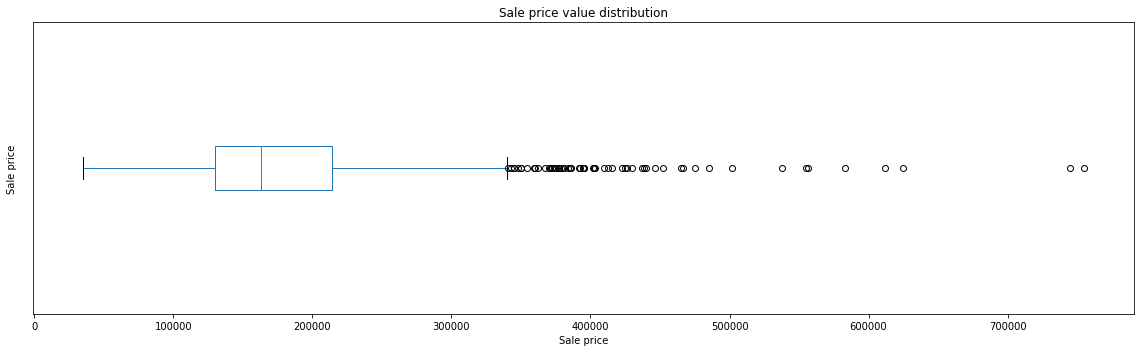

In [360]:
#check target variable distribution by box plot
plt.figure(figsize=(16,5))
app_train.SalePrice.plot(kind='box',vert=False)
plt.title('Sale price value distribution')
plt.xlabel('Sale price')
plt.yticks([0],[''])
plt.ylabel('Sale price\n', rotation=90)
plt.tight_layout()
plt.show()

In [361]:
#since sale price is not nornally distributed, use percentile to calculte outlier boundary
p25 = np.percentile(app_train.SalePrice, 25)
p75 = np.percentile(app_train.SalePrice, 75)

iqr = (p75 - p25)*3
lowerb = p25 - iqr
upperb = p75 + iqr

print('25 percentile :', p25)
print('75 percentile :', p75)
print('lower boundary :', lowerb)
print('upper boundary :', upperb)

25 percentile : 129975.0
75 percentile : 214000.0
lower boundary : -122100.0
upper boundary : 466075.0


In [362]:
#remove rows beyond upperboundary
print(app_train.shape)
app_train = app_train[app_train.SalePrice < upperb]
print(app_train.shape)

(1460, 81)
(1448, 81)


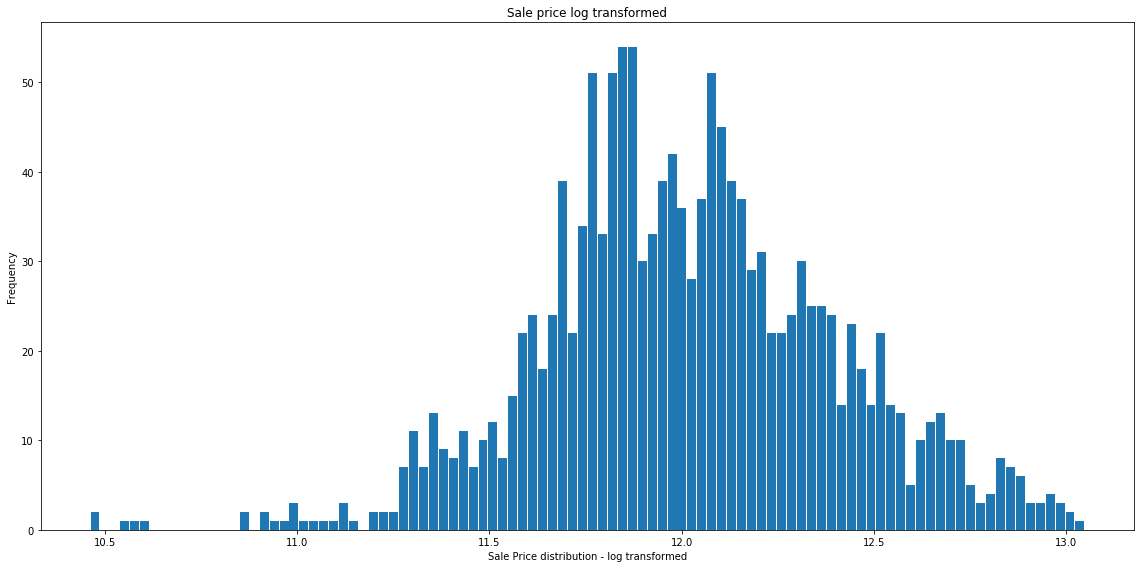

In [363]:
#check if log transformed sale price is normally distributed
logsaleprice = np.log1p(app_train.SalePrice)
plt.figure(figsize=(16,8))
logsaleprice.plot(kind='hist', bins=100, rwidth=0.9)
plt.title('Sale price log transformed')
plt.xlabel('Sale Price distribution - log transformed')
plt.tight_layout()
plt.show()

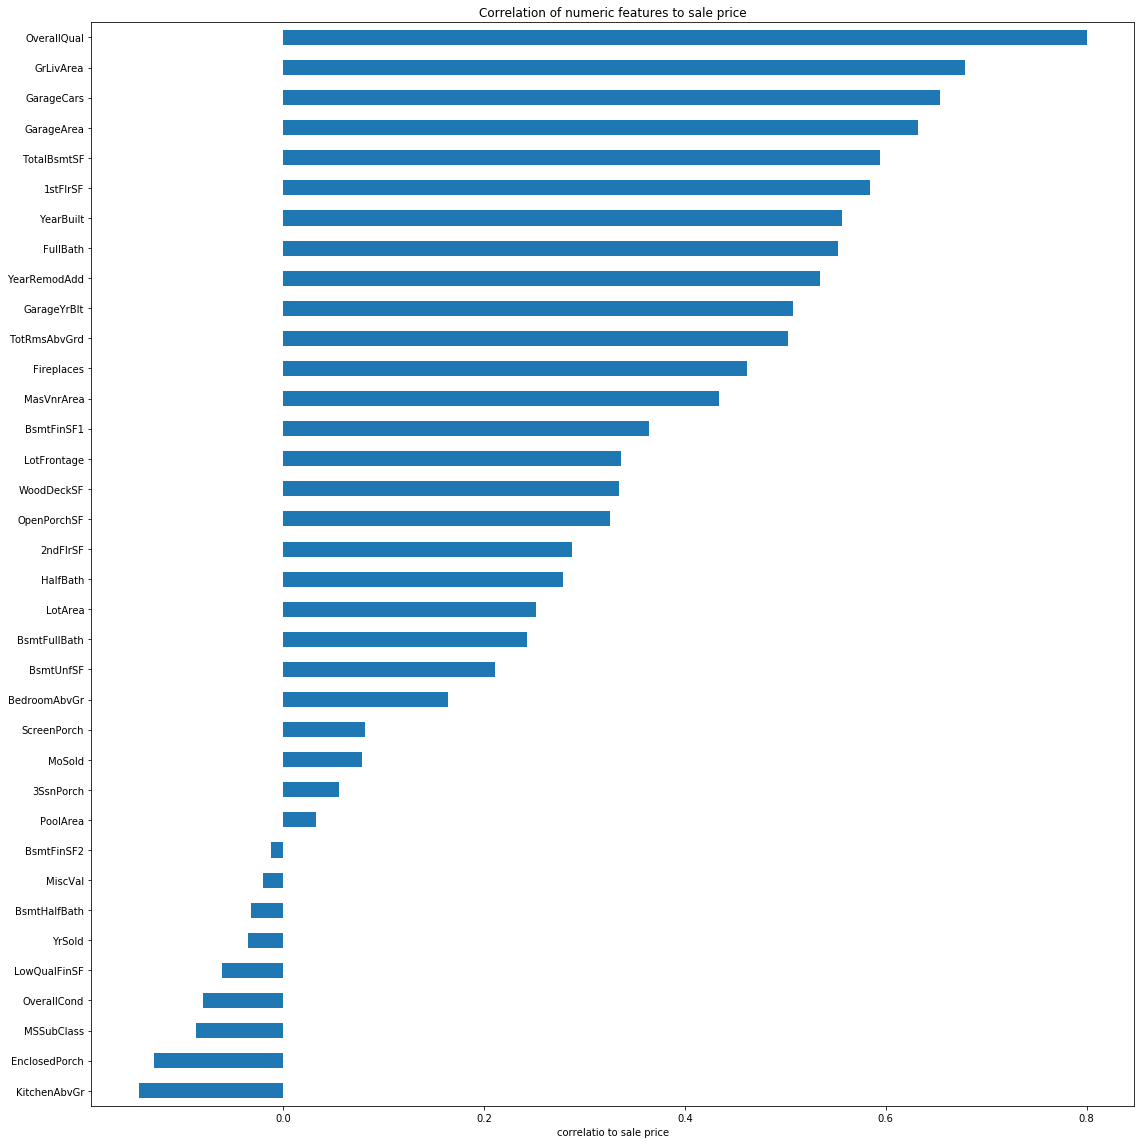

In [364]:
#drop Id and plot numerical features and sale price correlation 
corr = app_train.drop(['Id'], axis=1).select_dtypes(include='number').corr()

plt.figure(figsize=(16,16))
corr['SalePrice'].sort_values(ascending=True)[:-1].plot(kind='barh')
plt.title('Correlation of numeric features to sale price')
plt.xlabel('correlatio to sale price')
plt.tight_layout()
plt.show()

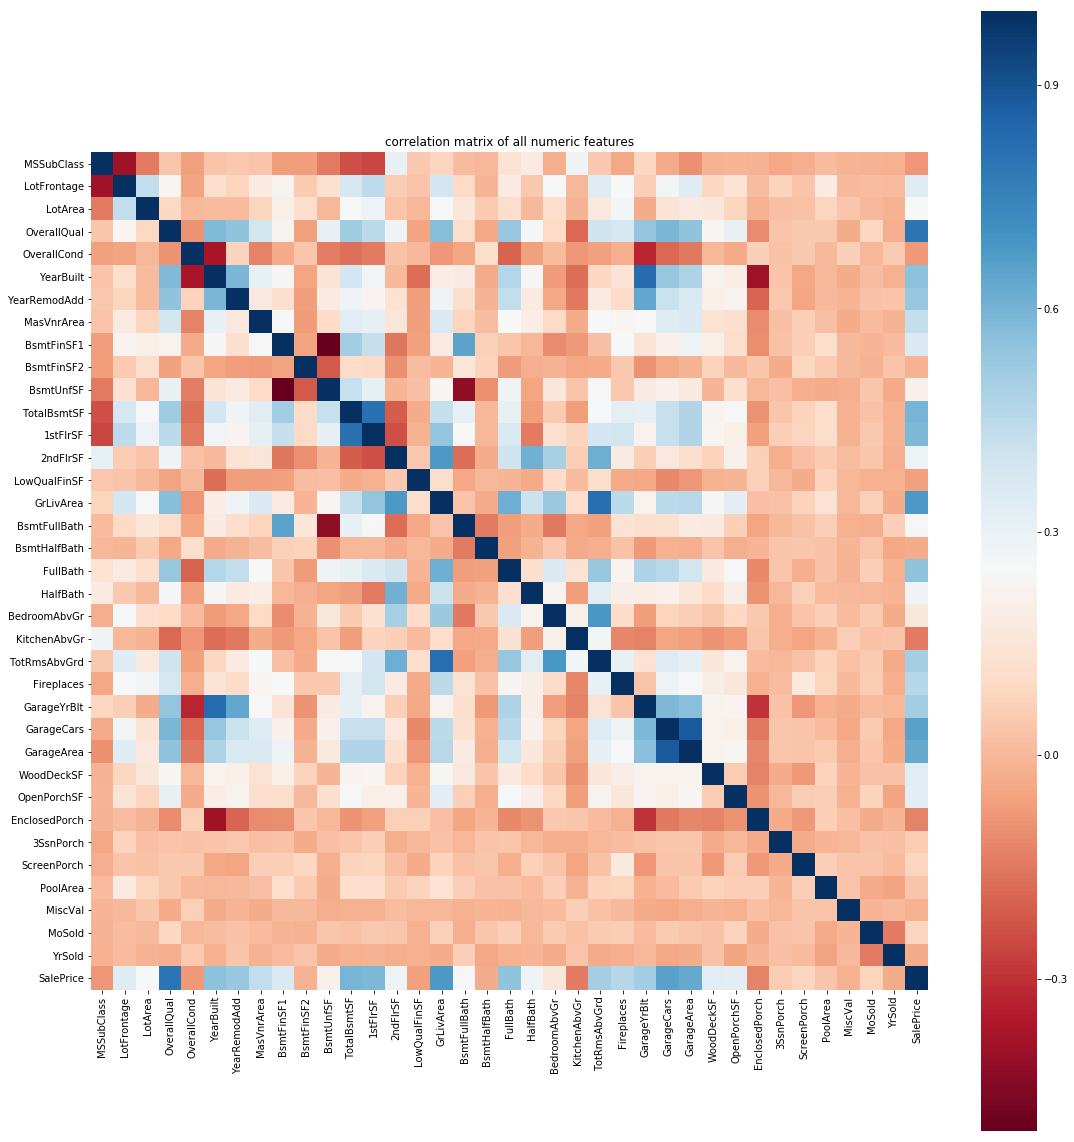

In [365]:
#check correlation between sale price and all numeric variables
plt.subplots(figsize=(16,16))
sns.heatmap(corr, cmap='RdBu', square=True)
plt.title('correlation matrix of all numeric features')
plt.tight_layout()
plt.show()

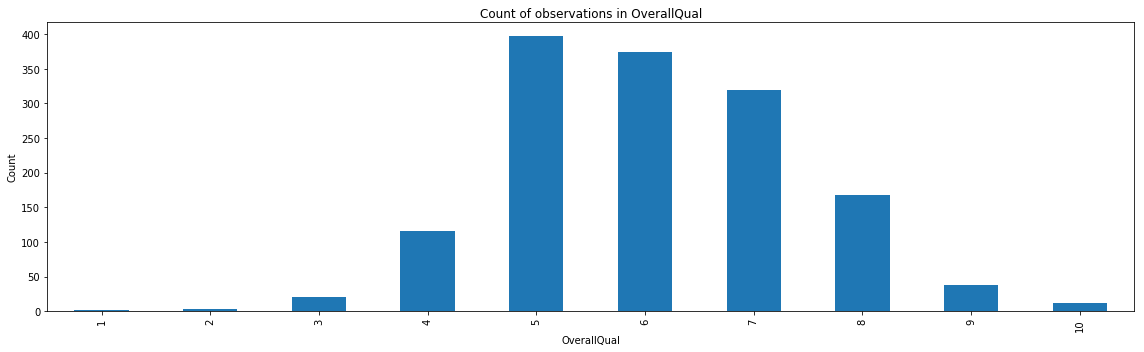

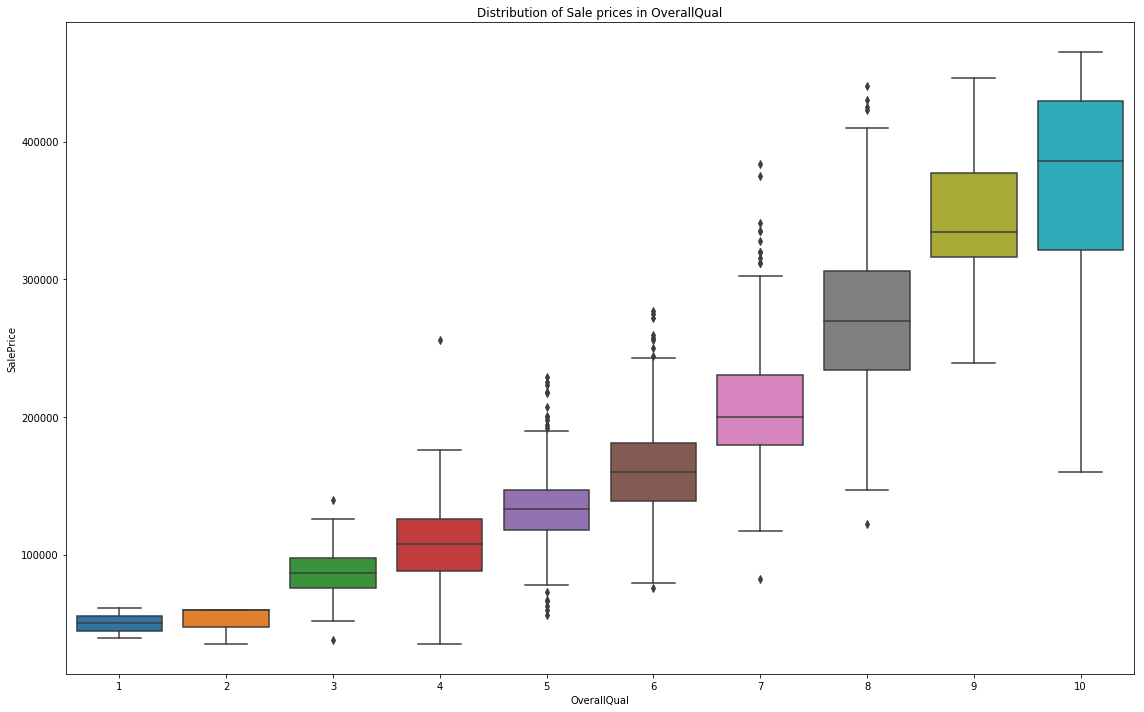

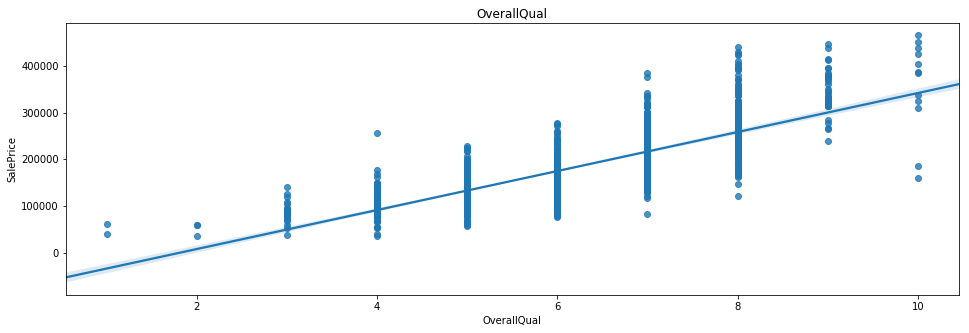

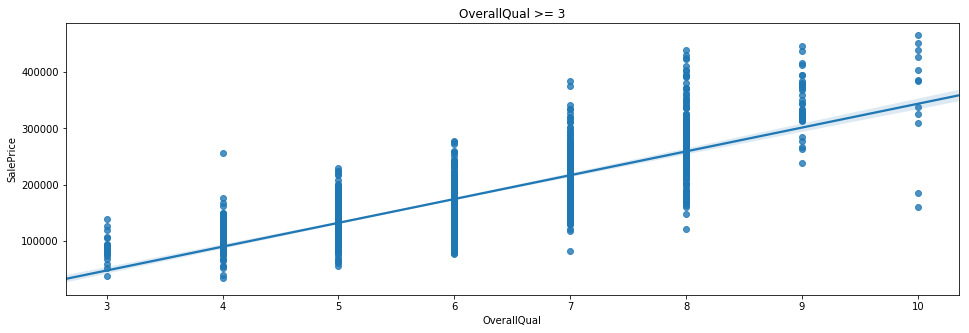

In [366]:
#OverallQual: Rates the overall material and finish of the house
plt.figure(figsize=(16,5))
app_train.groupby('OverallQual')['SalePrice'].count().plot(kind='bar')
plt.title('Count of observations in OverallQual')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,10))
sns.boxplot('OverallQual', y='SalePrice', data=app_train)
plt.title('Distribution of Sale prices in OverallQual')
plt.tight_layout()
plt.show()

#sale price is negative if OverallQual is 1 or 2
plt.figure(figsize=(16,5))
sns.regplot(x='OverallQual', y='SalePrice', data=app_train)
plt.title('OverallQual')
plt.show()

#remove data whose OverallQual is 1 or 2
plt.figure(figsize=(16,5))
sns.regplot(x='OverallQual', y='SalePrice', data=app_train[app_train['OverallQual'] >= 3])
plt.title('OverallQual >= 3')
plt.show()



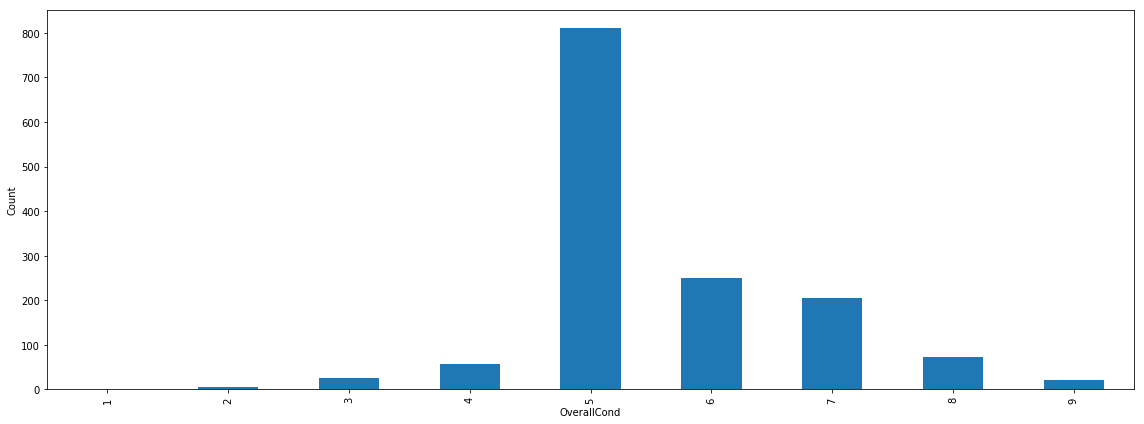

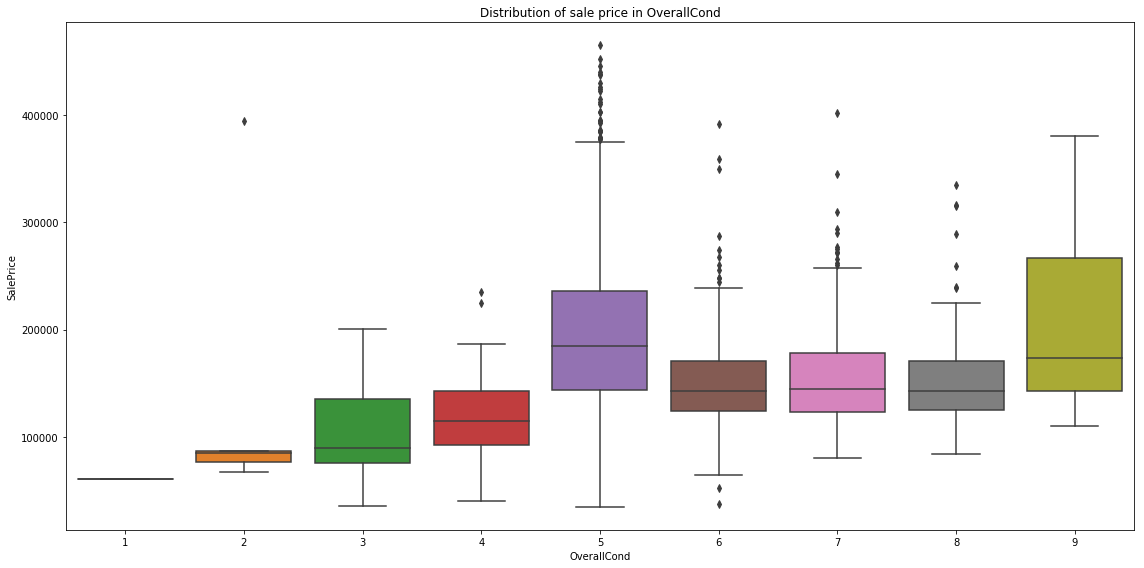

In [367]:
#OverallCond: Rates the overall condition of the house
plt.figure(figsize=(16,6))
app_train.groupby('OverallCond')['SalePrice'].count().plot(kind='bar')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(x='OverallCond', y='SalePrice', data=app_train)
plt.title('Distribution of sale price in OverallCond')
plt.tight_layout()
plt.show()

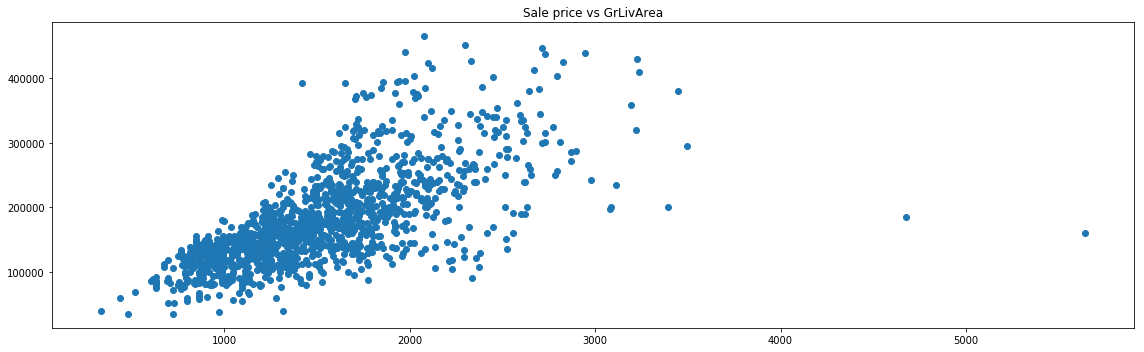

In [368]:
#GrLivArea: Above grade (ground) living area square feet
plt.figure(figsize=(16,5))
plt.scatter(x='GrLivArea', y='SalePrice', data=app_train)
plt.title('Sale price vs GrLivArea')
plt.tight_layout()
plt.show()        

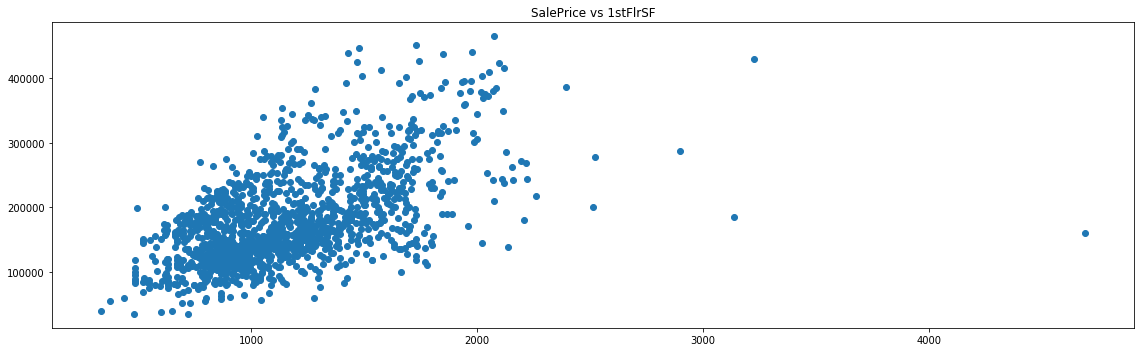

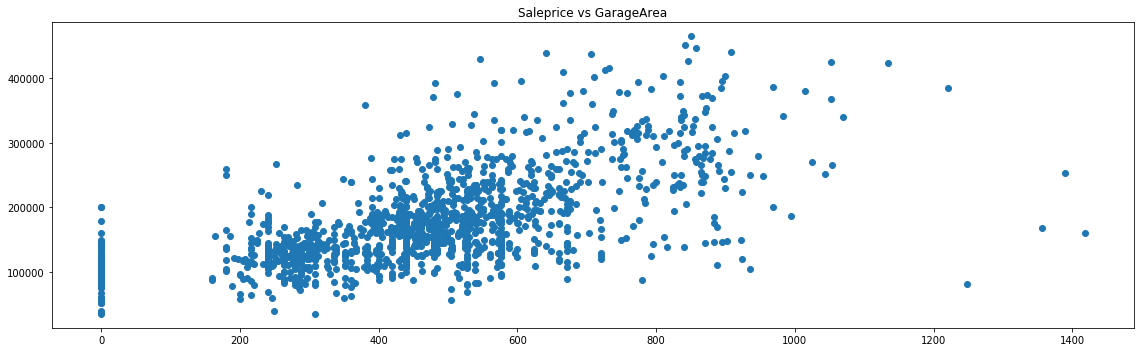

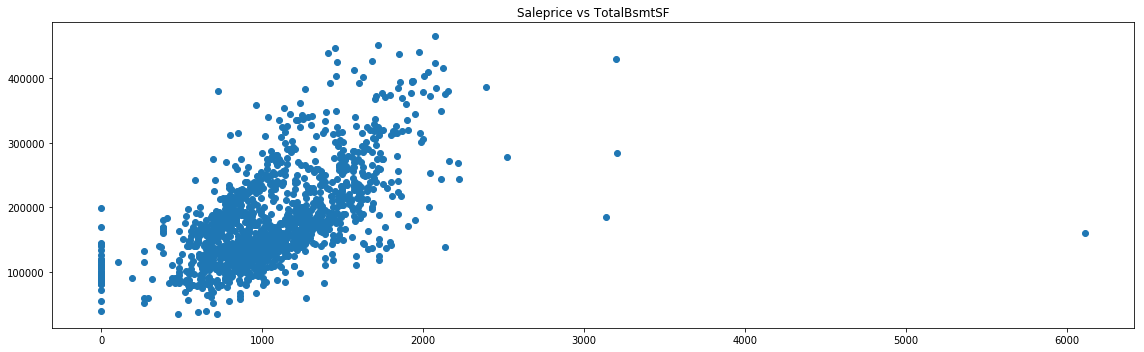

In [369]:
#1stFlrSF: First Floor square feet
plt.figure(figsize=(16,5))
plt.scatter(x='1stFlrSF', y='SalePrice', data=app_train)
plt.title('SalePrice vs 1stFlrSF')
plt.tight_layout()
plt.show()

#GarageArea: Size of garage in square feet
plt.figure(figsize=(16,5))
plt.scatter(x='GarageArea', y='SalePrice', data=app_train)
plt.title('Saleprice vs GarageArea')
plt.tight_layout()
plt.show()

#TotalBsmtSF: Total square feet of basement area
plt.figure(figsize=(16,5))
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=app_train)
plt.title('Saleprice vs TotalBsmtSF')
plt.tight_layout()
plt.show()

In [370]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

# Missing values statistics
missing_values = missing_values_table(app_train)
print("training data : ")
print(missing_values.head(20))

missing_values = missing_values_table(final_app_test)
print("test data : ")
print(missing_values.head(20))



Your selected dataframe has 81 columns.
There are 19 columns that have missing values.
training data : 
              Missing Values  % of Total Values
PoolQC                  1442               99.6
MiscFeature             1394               96.3
Alley                   1357               93.7
Fence                   1169               80.7
FireplaceQu              690               47.7
LotFrontage              258               17.8
GarageType                81                5.6
GarageYrBlt               81                5.6
GarageFinish              81                5.6
GarageQual                81                5.6
GarageCond                81                5.6
BsmtExposure              38                2.6
BsmtFinType2              38                2.6
BsmtFinType1              37                2.6
BsmtCond                  37                2.6
BsmtQual                  37                2.6
MasVnrArea                 8                0.6
MasVnrType                 8    

In [371]:
#fill the following categorical columns with NA
columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
for col in columns:
    app_train[col].fillna(value='NA', inplace=True)
    final_app_test[col].fillna(value='NA', inplace=True)
    
#fill Electrical with SBrkr
app_train['Electrical'].fillna(value='SBrkr', inplace=True)
final_app_test['Electrical'].fillna(value='SBrkr', inplace=True)

#fill LotFrontage with the most frequent values
app_train['LotFrontage'].fillna(value=app_train['LotFrontage'].value_counts().to_frame().index[0], inplace=True)
final_app_test['LotFrontage'].fillna(value=final_app_test['LotFrontage'].value_counts().to_frame().index[0], inplace=True)

#fill GarageYrBlt with 0 for no garage b/c those missing rows have GarageFinish as NA
app_train['GarageYrBlt'].fillna(value=0, inplace=True)

#final_app_test.loc[app_train['GarageYrBlt'].isnull(),['GarageYrBlt','GarageFinish']]
final_app_test['GarageYrBlt'].fillna(value=0, inplace=True)

#Fill MasVnrType with None, MasVnrArea with 0
app_train['MasVnrType'].fillna(value='None', inplace=True)
app_train['MasVnrArea'].fillna(value=0, inplace=True)

final_app_test['MasVnrType'].fillna(value='None', inplace=True)
final_app_test['MasVnrArea'].fillna(value=0, inplace=True)

#fill MSZoning,Utilities with the most frequent values
final_app_test['MSZoning'].fillna(value=final_app_test['MSZoning'].value_counts().to_frame().index[0], inplace=True)
final_app_test['Utilities'].fillna(value=final_app_test['Utilities'].value_counts().to_frame().index[0], inplace=True)
final_app_test['Functional'].fillna(value=final_app_test['Functional'].value_counts().to_frame().index[0], inplace=True)
final_app_test['Exterior1st'].fillna(value=final_app_test['Exterior1st'].value_counts().to_frame().index[0], inplace=True)
final_app_test['Exterior2nd'].fillna(value=final_app_test['Exterior2nd'].value_counts().to_frame().index[0], inplace=True)
final_app_test['KitchenQual'].fillna(value=final_app_test['KitchenQual'].value_counts().to_frame().index[0], inplace=True)
final_app_test['SaleType'].fillna(value=final_app_test['SaleType'].value_counts().to_frame().index[0], inplace=True)

#Fill BsmtFullBath with 0
final_app_test['BsmtFullBath'].fillna(value=0, inplace=True)
final_app_test['BsmtHalfBath'].fillna(value=0, inplace=True)
final_app_test['BsmtFinSF1'].fillna(value=0, inplace=True)
final_app_test['BsmtFinSF2'].fillna(value=0, inplace=True)
final_app_test['BsmtUnfSF'].fillna(value=0, inplace=True)
final_app_test['TotalBsmtSF'].fillna(value=0, inplace=True)

#Fill GarageCars,GarageArea with most frequent values for Detchd garage type
final_app_test.loc[final_app_test['GarageCars'].isnull(),['GarageType','GarageCars','GarageArea']]
final_app_test['GarageCars'].fillna(value=final_app_test.loc[final_app_test['GarageType']=='Detchd'].GarageCars.value_counts().to_frame().index[0], inplace=True)
final_app_test['GarageArea'].fillna(value=final_app_test.loc[final_app_test['GarageType']=='Detchd'].GarageArea.value_counts().to_frame().index[0], inplace=True)


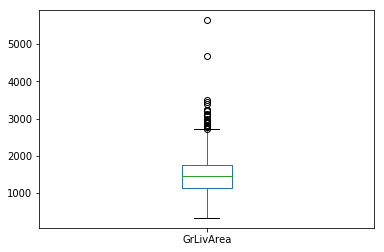

In [372]:
#checkoutliers for Above ground living area square feet 
app_train['GrLivArea'].plot.box()

In [373]:
#remove outliers for Above ground living area square feet
app_train = app_train[app_train['GrLivArea'] < 4000]

#create DV and IVs, drop Id column
x_app_train = app_train.iloc[:, 1:-1]
y_app_train = app_train['SalePrice']

print(x_app_train.shape)
print(y_app_train.shape)

(1446, 79)
(1446,)


In [374]:
#consolidate columns
x_app_train['All_SF'] = x_app_train['TotalBsmtSF'] + x_app_train['1stFlrSF'] + x_app_train['2ndFlrSF']   

x_app_train['Total_Bath'] = x_app_train['BsmtFullBath'] + 0.5*x_app_train['BsmtHalfBath'] + x_app_train['FullBath'] + 0.5*x_app_train['HalfBath']

x_app_train['Porch_SF'] = x_app_train['WoodDeckSF'] + x_app_train['OpenPorchSF'] + x_app_train['EnclosedPorch'] + x_app_train['3SsnPorch'] + x_app_train['ScreenPorch']

#drop above columns used for consoliated columns
x_app_train.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis = 1, inplace = True )
x_app_train.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis = 1, inplace = True )
x_app_train.drop(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis = 1, inplace = True )

#drop BsmtFinSF1, BsmtFinSF2, BsmtUnfSF
x_app_train.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'], axis = 1, inplace = True)

#do the same for testing data
final_app_test['All_SF'] = final_app_test['TotalBsmtSF'] + final_app_test['1stFlrSF'] + final_app_test['2ndFlrSF']   

final_app_test['Total_Bath'] = final_app_test['BsmtFullBath'] + 0.5*final_app_test['BsmtHalfBath'] + final_app_test['FullBath'] + 0.5*final_app_test['HalfBath']

final_app_test['Porch_SF'] = final_app_test['WoodDeckSF'] + final_app_test['OpenPorchSF'] + final_app_test['EnclosedPorch'] + final_app_test['3SsnPorch'] + final_app_test['ScreenPorch']

#drop above columns used for consoliated columns
final_app_test.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis = 1, inplace = True )
final_app_test.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis = 1, inplace = True )
final_app_test.drop(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis = 1, inplace = True )

#drop BsmtFinSF1, BsmtFinSF2, BsmtUnfSF
final_app_test.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'], axis = 1, inplace = True)


In [375]:
#check data who was sold before being built & fit them
print(x_app_train.loc[x_app_train['YearBuilt'] > x_app_train['YrSold'], ['YearBuilt', 'YrSold', 'YrActualAge']])
print(final_app_test.loc[final_app_test['YearBuilt'] > final_app_test['YrSold'], ['Id','YearBuilt', 'YrSold', 'YrActualAge']])
final_app_test.loc[1089, 'YrSold'] = final_app_test.loc[1089, 'YearBuilt'] 
final_app_test.loc[1089][['Id','YearBuilt', 'YrSold', 'YrActualAge']]

Empty DataFrame
Columns: [YearBuilt, YrSold, YrActualAge]
Index: []
        Id  YearBuilt  YrSold  YrActualAge
1089  2550       2008    2007          NaN


Id             2550
YearBuilt      2008
YrSold         2008
YrActualAge     NaN
Name: 1089, dtype: object

In [376]:
#label encoding
test_id = final_app_test[['Id']]
x_app_train = pd.get_dummies(x_app_train)
final_app_test = pd.get_dummies(final_app_test)

In [377]:
#align training and testing data, keep only columns present in both data frames
x_app_train, final_app_test = x_app_train.align(final_app_test, join = 'inner', axis = 1)

print(final_app_test.shape)
print(x_app_train.shape)

(1459, 272)
(1446, 272)


In [378]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

X = x_app_train
y = y_app_train
metric = 'neg_mean_squared_log_error'
clf = DummyRegressor('median')
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
print(f"{np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f} Log Error")

0.3857 Log Error


In [379]:
#compare Mean Squared Error of the Lienar Regression, RF, & GB
X = x_app_train
y = np.log1p(y_app_train)
metric = 'neg_mean_squared_error'
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

#Linear Regression
clf = LinearRegression()
print(f"Linear Regression : {np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f} Mean Squared Error")

#Random Forest
clf = RandomForestRegressor()
print(f"Random Forest : {np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f} Mean Squared Error")

#Gradient Boosting
clf = GradientBoostingRegressor()
print(f"Gradient Boosting : {np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f} Mean Squared Error")

Linear Regression : 0.1225 Mean Squared Error
Random Forest : 0.1404 Mean Squared Error
Gradient Boosting : 0.1204 Mean Squared Error


In [380]:
#compare to PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=250)
x_pca = pca.fit_transform(X)

y = np.log1p(y_app_train)
metric = 'neg_mean_squared_error'
#clf = LinearRegression()
#clf = RandomForestRegressor()
#clf = xgb.XGBRegressor(objective='reg:squarederror')
clf = GradientBoostingRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
print(f"{np.sqrt(-cross_val_score(clf, x_pca, y, cv=kfold, scoring=metric)).mean():.4f} Mean Squared Error")

0.1444 Mean Squared Error


In [384]:
#deine the parameter values that should be searched
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

parameters = {
    'n_estimators' : [2500],
    'max_features' : ['sqrt', 'log2'],
    'max_depth' : [2, 3],
    'learning_rate' : [0.03, 0.04, 0.05],
    'min_samples_leaf' : [15],
    'min_samples_split' : [10],
    'loss' : ['ls', 'huber','lad', 'quantile']
}

grid = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=parameters, cv=20, n_jobs=-1)
X = x_app_train 
y = np.log1p(y_app_train)
grid.fit(X, y)
grid.best_params_


{'learning_rate': 0.04,
 'loss': 'huber',
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'min_samples_split': 10,
 'n_estimators': 2500}

In [381]:
#using tuned parameter
X = x_app_train 
y = np.log1p(y_app_train)
metric = 'neg_mean_squared_error'

clf = GradientBoostingRegressor(n_estimators=2500, learning_rate=0.04,max_depth=2, max_features='sqrt', min_samples_leaf=15,min_samples_split=10, loss='huber', random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
print(f"Gradient Boost : {np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f} Mean Squared Error")

Gradient Boost : 0.1115 Mean Squared Error


In [382]:
#make prediction
app_test = final_app_test
clf.fit(X,y)
final_y_pred = np.expm1(clf.predict(app_test))

submit = test_id
submit['SalePrice'] = final_y_pred

submit.head()

submit.to_csv('submission.csv', index=False)